# Decision-Tree Algorithm Applications to Iris Dataset 

## Dataset Description/Project Motivations
As quoted from the Kaggle description for this dataset, the Iris dataset was used in Fishers classic 1936 paper, “The Use of Multiple Measurements in Taxonomic Problems”. For the purpose of this project I have imported it from the UCI Machine Learning Repository. 

The Iris dataset is a famous dataset often used by Machine Learning beginners to develop their understanding of classification problems.The dataset contains 4 features which include the Sepal Length, Sepal Width, Petal Length, and Petal Width. These features are used to predict or classify the predictions into three species of Iris including the Iris-setosa, Iris-Versicolor, and Iris-Virginica. 

The dataset contains 150 observations with 50 observations each belonging to the Iris-setosa, Iris-Versicolor, and Iris-virginica species. 

I decided to practice Decision Tree Algorithms with this dataset to increase my practical understanding of the algorithm as well as its prediction behavior.

## Software and Libraries

This project uses the following software and Python libraries:

* pandas
* NumPy
* seaborn 
* matplotlib
* scikit-learn
* graphviz 

## Project Objective

* Using Decision Tree/Random Forest Classification Algorithm to predict the correct Iris Species 
* Basic data exploration
* Develop skills in Python

![Iris Machine Learning](http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg)

## Import Dataset and Perform Cleaning/Validation

First, I will import the dependent packages for the project as well as the dataset from the UCI Machine Learning Repository. 

In [275]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
import graphviz

# Add Plots inline for increased clarity
%matplotlib inline

# Hide Warnings 
import warnings 
warnings.filterwarnings('ignore')

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, names=names)

## Data Exploration/Cleaning 

### Data Structure
Quick exploration via the head and info function reveals that the Dataset has 150 observations and 5 columns.

4 features exists:  
* sepal_length (float)
* sepal_width  (float)
* petal_length (float)
* petal_width  (float)

1 categorical classifier exists: 
* species (string)

In [276]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [277]:
##Dataset Classes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Quick Statistics 
A quick summary through the describe function shows the standard deviation, min value, 25th percentile, 50th percentile, 75th percentile, and max value of each feature in the Iris dataset. The describe function can be useful for determining whether possible outliers exist.

I have also rounded to two decimal places for ease of interpretation.

In [278]:
#Summarize Dataset
round(df.describe(),2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### Checking for Nulls
It is important to check for null values as these values will need to be filled or excluded from the analysis depending on situation. It seems there are no null values in the dataset. No data cleaning is needed for this dataset.

In [279]:
#Null Check Function
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

## Visualize Statistical Distributions / Feature Relationships

### Histogram Visualization
Utilizing the seaborn distplot function provides further insight into the data distribution by Sepal Length, Sepal Width, Petal Length, and Petal Width. 

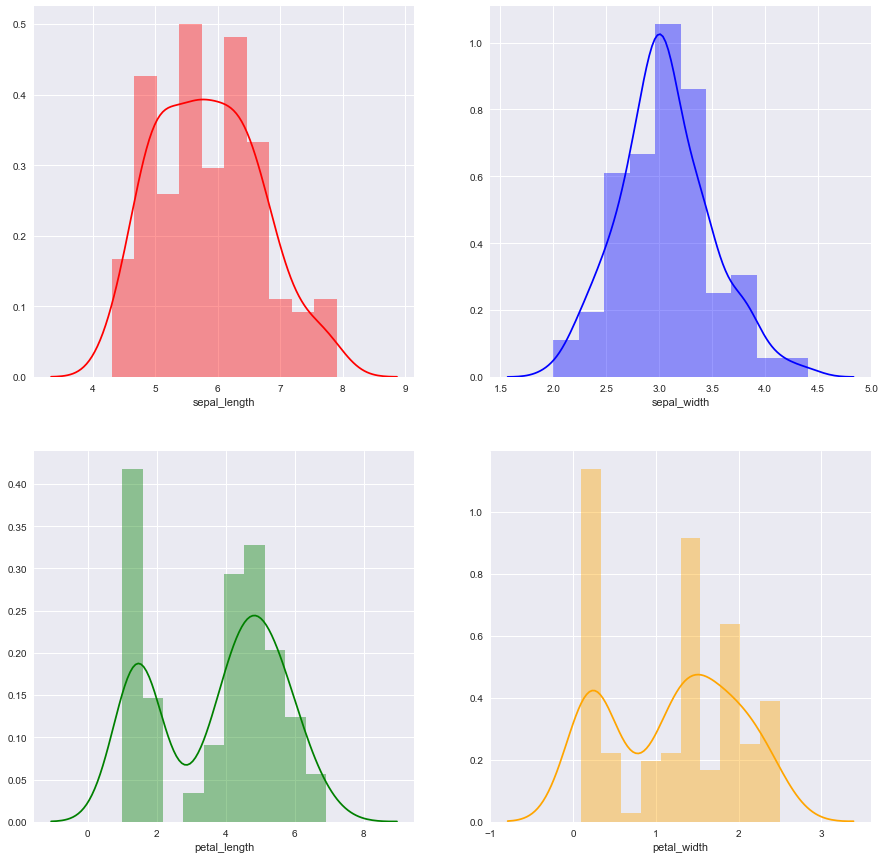

In [280]:
##Visualize Distributions 
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize =(15,15))
sns.distplot(df.sepal_length, bins=10, color='red', ax=axes[0,0])
sns.distplot(df.sepal_width, bins=10, color='blue',ax=axes[0,1])
sns.distplot(df.petal_length, bins=10, color='green',ax=axes[1,0])
sns.distplot(df.petal_width, bins=10, color='orange',ax=axes[1,1])

### Scatterplot Visualization
The Seaborn pairplot provides a useful function for visualizing the relationship between each feature in the dataset. 
After specifying the hue as the categorical variable species, it is much clearer to see the relationships as well as outliers.  

For the most part the scatter plot reveals that each iris species has closely related features to others of the same species. 

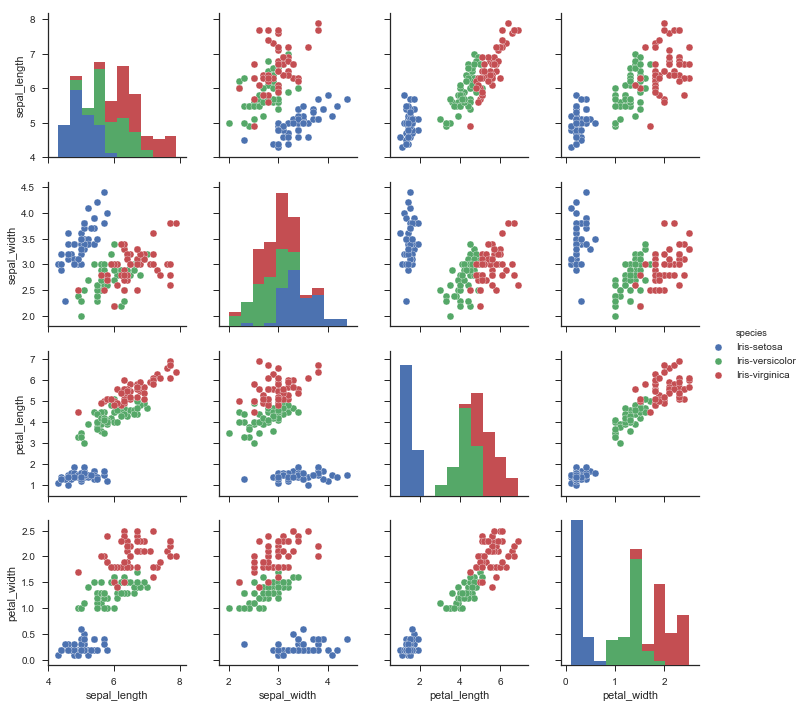

In [302]:
# scatter plot matrix
sns.set(style="ticks")
sns.pairplot(df, hue="species")

## Data Preparation for Machine Learning - Classification Decision Tree 

### Step I - Split the Independent and Dependent Variables into separate datasets
The data must be split into a 2 datasets. One for the Independent variables (features) and another for the Dependent variables (category).

In [303]:
##Create table excluding the(Dependent Var)
X = df.iloc[:, 0:4].values
##Create table for only Dependent Var
y = df.iloc[:, 4].values

### Step II - Split the Datasets into a Training Set and Test Set
The data must be split into a training set as one has not been provided. I am using the sklearn package to perform the training and test data split and decided to perform an 80:20 ratio split. 

80 % for Training and 20 % for Testing/Validation purposes.

In [304]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Step III - Fit the Classifier to the Training Set
I am using the sklearn package and decision tree classifier function to fit the classifier to the training set.  

In addition, the criterion argument can be used to specify method for determining splits. (gini, entrophy etc.)

    As mentioned in the book, Introduction to Statistical Learning with Applications in R by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani: 
    The Gini Index and Cross Entrophy function are typically used to evaluate tree split quality.
    
For this example, I decided to experiment with the entrophy function. 

In [305]:
# Fitting classifier to the Training set 
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Step IV - Perform Predictions with Test Set
The predict function is then used to create predictions with the test observations. 
The y_pred variable reveals what each of the 30 observations were classified as.

In [306]:
# Predicting Test set results 
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Step V - Visualize Predictions with Confusion Matrix
The Confusion Matrix provides insight into how well the test set was classified and is a useful tool for visualizing predicted values of a classifier as well as an actual value.  

According to the Confusion Matrix there was 1 incorrect classification out of 30. The one incorrect classification was an Iris-versicolor being classified as an Iris-virginica. 

In [307]:
#Confusion Matrix 
cmdt = confusion_matrix(y_test, y_pred)
cmdt

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [308]:
cmdt2 = ConfusionMatrix(y_test, y_pred)
cmdt2

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  __all__
Actual                                                                
Iris-setosa               11                0               0       11
Iris-versicolor            0               12               1       13
Iris-virginica             0                0               6        6
__all__                   11               12               7       30

### Step VI - Evaluation of Model
The score function outputs the efficiency of the model. 
Due to 29/30 observations being classified correctly the model has an accuracy of 96.6%.

In [309]:
classifier.score(X_test,y_test)

0.96666666666666667

## Decision Tree Visualization 
The below decision tree was visualized with the graphviz package and details all of the decision tree logic used to classify the training set.  



#### Decision Tree Terminology: 

* 1st Row - Internal Node (Condition) 
* 2nd Row - Gini Index or Entrophy Value (Split Evaluator) 
* 3rd Row - Number of observations classified to the category
* 4th Row - Classification Split Summary for node
* 5th Row - Resultant Classification (If Terminal Node) 


#### Class Definitions 

* class y0 = Iris-Setosa 
* class y1 = Iris-versicolor 
* class y2 = Iris-Virginica

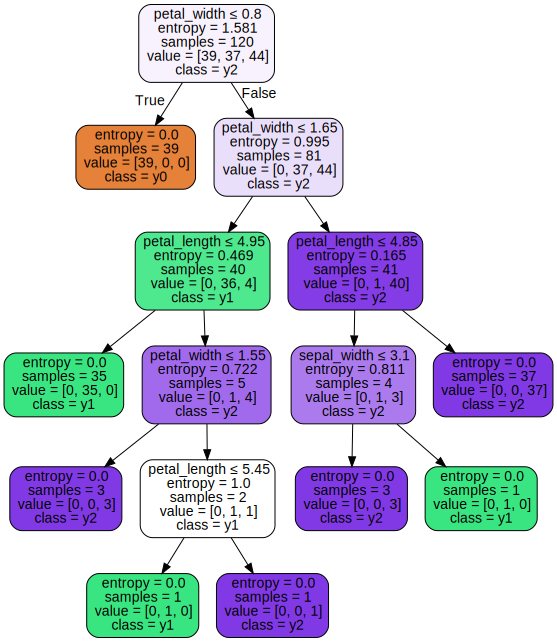

In [310]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                         feature_names=df.columns[0:4],
                         class_names=True,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

## Random Forest Application to Iris Dataset
The datasets has already been prepared so I will skip straight to fitting the classifier to the Random Forest Algorithm.

Random Forest is a form of ensemble learning which combines many decision trees to make a prediction. 
Random forests provide an improvement over bagged trees through de-correlation of the trees. In comparison to normal decision trees, random forests sacrifice ease of interpretation for predictive accuracy and also have many modern uses.

I am using the sklearn package and ensemble library as well as the random forest classifier function to fit the classifier to the training set.  
    
The n_estimators argument is used to specify how many trees to utilize. I have specified 100 trees for this random forest and will also utilize the entrophy criterion.

In [311]:
##Random Forest Application 
classifierrf = RandomForestClassifier(n_estimators = 100, criterion='entropy')
classifierrf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Perform Predictions with Test Set
The predict function is then used to create predictions with the test observations. 
The y_predrf variable reveals what each of the 30 observations were classified as.

In [312]:
y_predrf = classifier.predict(X_test)
y_predrf

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Visualize Predictions with Confusion Matrix
The Confusion Matrix provides insight into how well the test set was classified with the use of the Random Forest algorithm. 

According to the Confusion Matrix there was 1 incorrect classification out of 30. The one incorrect classification was an Iris-versicolor being classified as an Iris-virginica. This is the same incorrect classification that impacted the original Decision Tree model.

In [313]:
cmrf = confusion_matrix(y_test, y_predrf)
cmrf

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [314]:
cmrf2 = ConfusionMatrix(y_test, y_predrf)
cmrf2

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  __all__
Actual                                                                
Iris-setosa               11                0               0       11
Iris-versicolor            0               12               1       13
Iris-virginica             0                0               6        6
__all__                   11               12               7       30

## Conclusion
The Decision Tree model itself seems robust enough to make consistent predictions on the Iris Dataset as it is quite simple and the observations are quite closely related feature wise. 

The Decision Tree Classifier and Random Forest Classifiers both returned around a 96.6 % prediction rate. 

I look forward to applying Decision Trees and other forms of ensemble trees like Random Forest, Bagging, and Boosting on more complex datasets in the future.  